Notatnik ten zawiera charakterystykę próby

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Wczytanie danych

In [2]:
df = pd.read_csv("MGR/Kwestionariusz_ocena.csv")
df.head()

,ID,plec,wiek,miejsce_zamieszaknia,znajomosc_sztuki,sytuacja_materialna,grupa,obraz1_gust,obraz1_przeslanie,obraz1_piekno,...,obraz6_wartosc,obraz7_gust,obraz7_przeslanie,obraz7_piekno,obraz7_wartosc,obraz8_gust,obraz8_przeslanie,obraz8_piekno,obraz8_wartosc,uwagi
0,1.0,m,23.0,mieszkanie_wynajmowane,ograniczona,2.0,k,4.0,3.0,4.0,...,3.0,5.0,3.0,4.0,4.0,4.0,2.0,4.0,3.0,OUTED be NICHT WORK
1,2.0,m,23.0,mieszkanie_wynajmowane,brak,2.0,k,3.0,1.0,4.0,...,2.0,2.0,1.0,3.0,4.0,4.0,4.0,5.0,5.0,NaN
2,3.0,k,24.0,mieszkanie_wynajmowane,ograniczona,2.0,k,4.0,3.0,4.0,...,2.0,5.0,4.0,5.0,3.0,4.0,4.0,4.0,4.0,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,k,24.0,mieszkanie_wlasne,ograniczona,3.0,k,3.0,1.0,3.0,...,2.0,4.0,2.0,4.0,3.0,5.0,4.0,4.0,4.0,NaN


In [3]:
df = df.dropna(how='all')
df = df[df.ID != 1]
df = df[df.ID != 29]

missing = df.isnull().sum()
missing[missing > 0]

uwagi    11
dtype: int64

# Analiza

In [4]:
#Liczebność
n = len(df)
print(f"Liczba uczestników: {n}")

Liczba uczestników: 24


In [5]:
#liczebność grup
print(df['grupa'].value_counts())

grupa
k    12
e    12
Name: count, dtype: int64


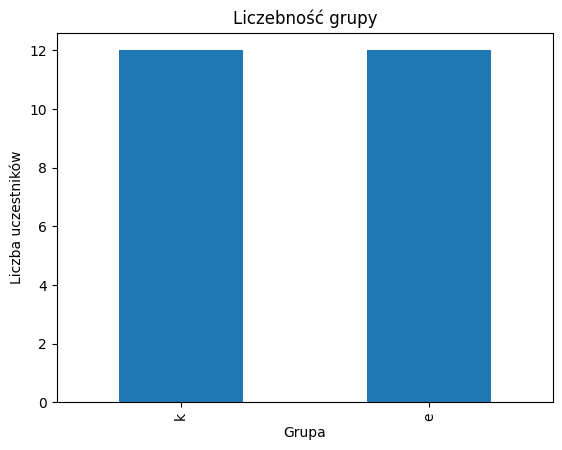

In [6]:
df['grupa'].value_counts().plot(kind='bar', title='Liczebność grupy')
plt.xlabel('Grupa')
plt.ylabel('Liczba uczestników')
plt.show()

In [7]:
#rozkład płci
print(df['plec'].value_counts())

plec
m    12
k    12
Name: count, dtype: int64


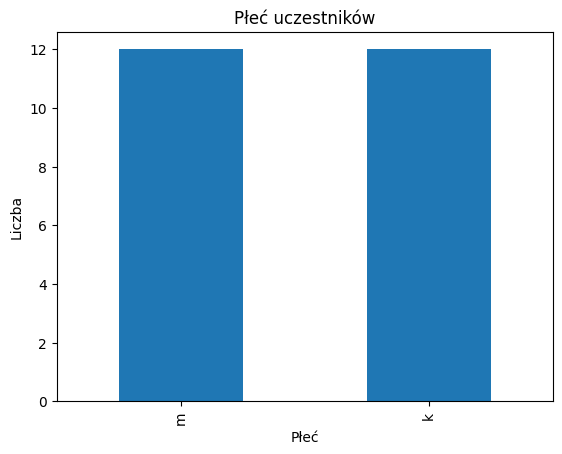

In [8]:
df['plec'].value_counts().plot(kind='bar', title='Płeć uczestników')
plt.xlabel('Płeć')
plt.ylabel('Liczba')
plt.show()

In [9]:
print(df.groupby('grupa')['plec'].value_counts())

grupa  plec
e      k       7
       m       5
k      m       7
       k       5
Name: count, dtype: int64


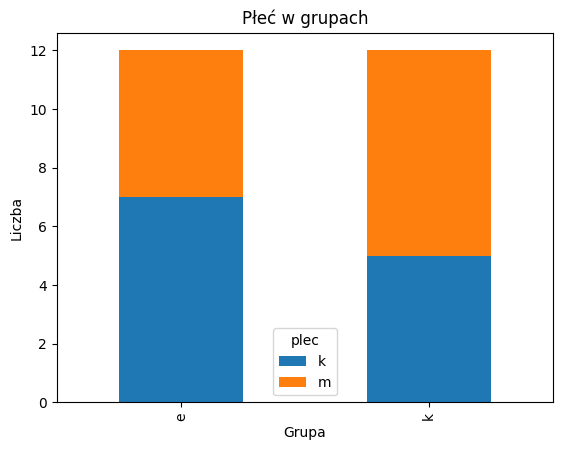

In [10]:
pd.crosstab(df['grupa'], df['plec']).plot(kind='bar', stacked=True)
plt.title('Płeć w grupach')
plt.xlabel('Grupa')
plt.ylabel('Liczba')
plt.show()

In [11]:
#rozkład znajomości sztuki
print(df['znajomosc_sztuki'].value_counts())

znajomosc_sztuki
ograniczona      15
hobbystyczna      5
brak              2
profesjonalna     2
Name: count, dtype: int64


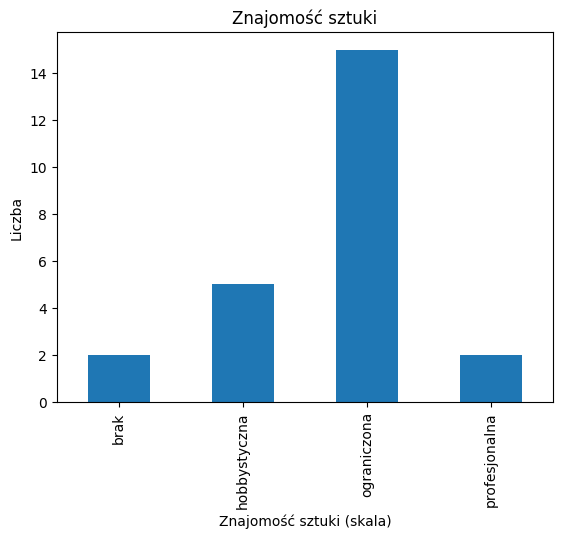

In [12]:
df['znajomosc_sztuki'].value_counts().sort_index().plot(kind='bar', title='Znajomość sztuki')
plt.xlabel('Znajomość sztuki (skala)')
plt.ylabel('Liczba')
plt.show()

In [13]:
print(df['sytuacja_materialna'].value_counts())

sytuacja_materialna
2.0    17
3.0     3
0.0     2
1.0     2
Name: count, dtype: int64


Dekodowanie:
- **1**: stać mnie na luksusowe rzeczy, także bardzo kosztowne
- **2**: stać mnie na wszelkie wydatki, ale na zakup kosztownych rzeczy muszę pożyczyć/oszczędzać
- **3**: nie stać mnie na zbędne wydatki
- **4**: mam problem z opłaceniem podstawowych opłat
- **0**: odmawiam odpowiedzi

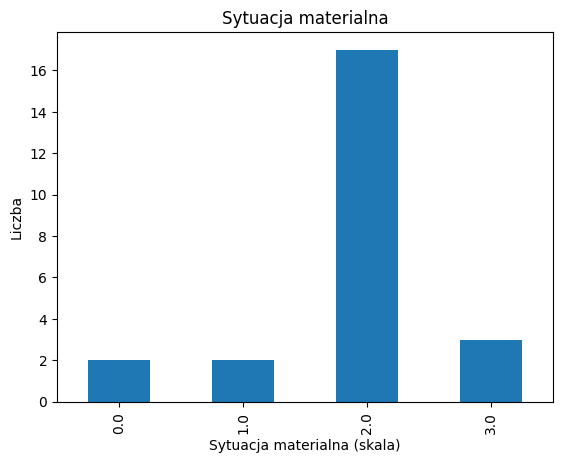

In [14]:
df['sytuacja_materialna'].value_counts().sort_index().plot(kind='bar', title='Sytuacja materialna')
plt.xlabel('Sytuacja materialna (skala)')
plt.ylabel('Liczba')
plt.show()

In [15]:
print(df['miejsce_zamieszaknia'].value_counts())

miejsce_zamieszaknia
mieszkanie_wynajmowane    9
dom_rodzinny              8
mieszkanie_wlasne         3
akademik                  3
inne                      1
Name: count, dtype: int64


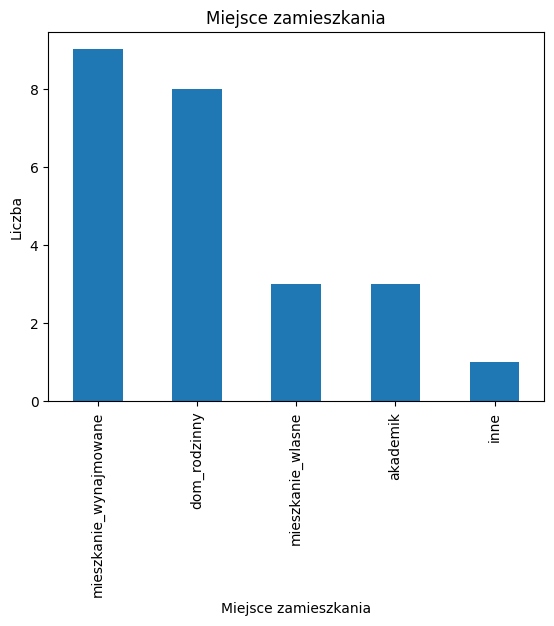

In [16]:
df['miejsce_zamieszaknia'].value_counts().plot(kind='bar', title='Miejsce zamieszkania')
plt.xlabel('Miejsce zamieszkania')
plt.ylabel('Liczba')
plt.show()

In [17]:
kategorie = ['gust', 'przeslanie', 'piekno', 'wartosc']
rows = []
for i in range(1, 9):
    for kat in kategorie:
        col = f'obraz{i}_{kat}'
        mean = df[col].mean()
        std = df[col].std()
        rows.append({'Obraz': i, 'Kategoria': kat, 'Średnia': round(mean, 2), 'SD': round(std, 2)})

summary_df = pd.DataFrame(rows)
summary_df

,Obraz,Kategoria,Średnia,SD
0,1,gust,3.46,0.72
1,1,przeslanie,2.17,0.87
2,1,piekno,3.42,0.83
3,1,wartosc,2.88,0.95
4,2,gust,3.38,1.01
5,2,przeslanie,2.33,1.24
6,2,piekno,3.46,0.78
7,2,wartosc,2.38,1.13
8,3,gust,2.46,1.18
9,3,przeslanie,3.12,0.99


In [19]:
def podsumowanie_kolumny(df, kolumna, label=None):
    counts = df[kolumna].value_counts().reset_index()
    counts.columns = ['Podgrupa', 'n']
    counts['%'] = (counts['n'] / len(df) * 100).round(1)
    counts.insert(0, 'Zmienna', label if label else kolumna)
    return counts

# Tworzenie podsumowań dla każdej kolumny
tabele = [podsumowanie_kolumny(df, 'plec', 'Płeć'),
          podsumowanie_kolumny(df, 'miejsce_zamieszaknia', 'Miejsce zamieszkania'),
          podsumowanie_kolumny(df, 'znajomosc_sztuki', 'Znajomość sztuki'),
          podsumowanie_kolumny(df, 'sytuacja_materialna', 'Sytuacja materialna')]

# Łączenie w jedną tabelę
tabela_podsumowanie = pd.concat(tabele, ignore_index=True)

# Wyświetlenie tabeli
print(tabela_podsumowanie)

                 Zmienna                Podgrupa   n     %
0                   Płeć                       m  12  50.0
1                   Płeć                       k  12  50.0
2   Miejsce zamieszkania  mieszkanie_wynajmowane   9  37.5
3   Miejsce zamieszkania            dom_rodzinny   8  33.3
4   Miejsce zamieszkania       mieszkanie_wlasne   3  12.5
5   Miejsce zamieszkania                akademik   3  12.5
6   Miejsce zamieszkania                    inne   1   4.2
7       Znajomość sztuki             ograniczona  15  62.5
8       Znajomość sztuki            hobbystyczna   5  20.8
9       Znajomość sztuki                    brak   2   8.3
10      Znajomość sztuki           profesjonalna   2   8.3
